### Model LDA dan LSA Pemilu

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('filtered_online_news_pemilu3.csv')
data.head(5)

,title,content,tanggal_berita,content_clean,link_berita,asal_berita,sentimen
0,PAN x JakCloth! Pesta Anak Nongkrong Sambangi ...,Kumaha barudak? Well!Yuk ramaikan Pesta Anak N...,10-11-2023,kumaha barudak well yuk ramaikan pesta anak no...,https://20.detik.com/advertorial/20231109-2311...,Detik News,netral
1,Kapolri Bicara Arti Sumpah Pemuda di #DemiIndo...,Kapolri Jenderal Lisyto Sigit Prabowo bicara a...,27-10-2023,kapolri jenderal lisyto sigit prabowo bicara s...,https://20.detik.com/demi-indonesia/20231027-2...,Detik News,positif
2,Arahan Megawati di Rakernas IV PDIP: Turun ke ...,"Ketua Umum PDIP, Megawati Soekarnoputri mengin...",01-10-2023,ketua umum pdip megawati soekarnoputri kader m...,https://20.detik.com/detikupdate/20231001-2310...,Detik News,netral
3,"Bertemu Habib Rizieq, Cak Imin Bantah Bahas Du...",Pasangan capres-cawapres dari Koalisi Perubaha...,01-10-2023,pasangan capres cawapres koalisi perubahan ani...,https://20.detik.com/detikupdate/20231001-2310...,Detik News,netral
4,"Menag Singgung Politisasi Agama di Pilgub DKI,...",Ketum PKB Muhaimin Iskandar atau Cak Imin mere...,01-10-2023,ketum pkb muhaimin iskandar cak imin merespons...,https://20.detik.com/detikupdate/20231001-2310...,Detik News,netral


In [3]:
len(data)

29534

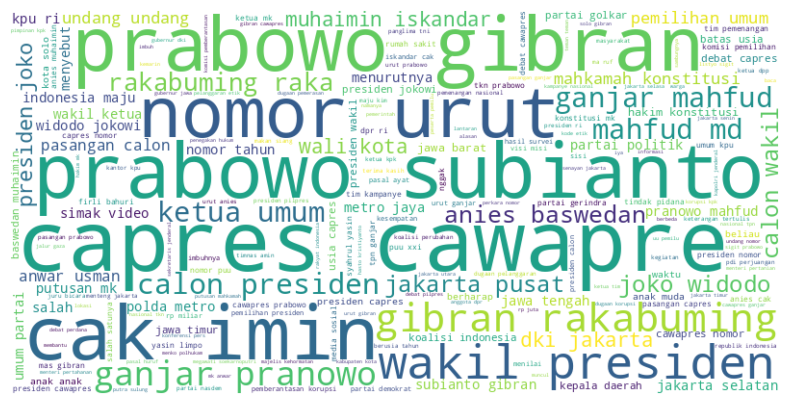

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all texts into one string
all_texts = ' '.join(data['content_clean'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_texts)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## LDA

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Membuat objek TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=1,
                             norm='l2',
                             smooth_idf=True,
                             use_idf=True,
                             ngram_range=(1,2))

In [6]:
# Mengubah teks menjadi representasi vektor
X = vectorizer.fit_transform(data['content_clean'])

# Membuat model LDA dengan 10 topik
num_topics = 3
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

In [7]:
# Melatih model LDA
lda_model.fit(X)

# Mendapatkan kata-kata kunci untuk setiap topik
feature_names = vectorizer.get_feature_names_out()

top_n_words = 10  # Jumlah kata kunci untuk setiap topik
for topic_idx, topic in enumerate(lda_model.components_):
    print(f"Topik {topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[:-top_n_words - 1:-1]])

Topik 1:
['mk', 'mkmk', 'hakim', 'anwar', 'putusan', 'konstitusi', 'anwar usman', 'usman', 'hakim konstitusi', 'etik']
Topik 2:
['prabowo', 'gibran', 'ganjar', 'presiden', 'anies', 'cawapres', 'mahfud', 'partai', 'jokowi', 'debat']
Topik 3:
['hamka aq', 'np', 'hamka', 'np 30', 'istri hamka', 'aq', 'sulungnya ad', 'kematian hamka', 'hamka np', 'rumah hamka']


#### Visualasi

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.manifold import MDS


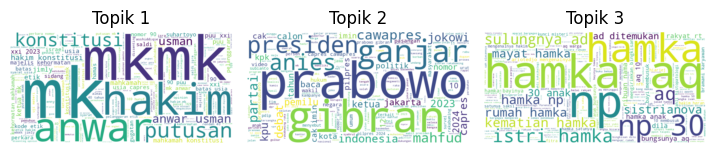

In [9]:
# Word Cloud
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(feature_names, lda_model.components_[i])))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


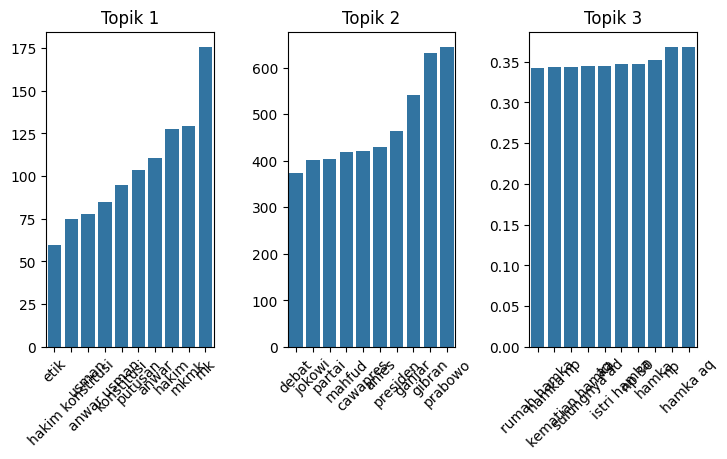

In [10]:
# Bar Plot
plt.figure(figsize=(12, 8))
for i in range(num_topics):
    plt.subplot(2, 5, i+1)
    sns.barplot(x=[feature_names[j] for j in lda_model.components_[i].argsort()[-top_n_words:]], y=lda_model.components_[i][lda_model.components_[i].argsort()[-top_n_words:]])
    plt.title(f'Topik {i+1}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## LSA 

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Membuat vektor TF-IDF
vectorizer = TfidfVectorizer(min_df=1,
                             norm='l2',
                             smooth_idf=True,
                             use_idf=True,
                             ngram_range=(1,2))
X = vectorizer.fit_transform(data['content_clean'])

# Membuat model LSA dengan 10 topik
lsa_model = TruncatedSVD(n_components=3)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Menampilkan kata-kata teratas untuk setiap topik
terms = vectorizer.get_feature_names_out()
for i, topic in enumerate(lsa_model.components_):
    top_terms = [terms[j] for j in topic.argsort()[-10:]]
    print(f"Topik {i+1}: {', '.join(top_terms)}")


Topik 1: capres, mahfud, mk, partai, debat, presiden, cawapres, ganjar, prabowo, gibran
Topik 2: etik, usia, usman, anwar usman, konstitusi, anwar, mkmk, hakim, putusan, mk
Topik 3: korupsi, polda, polda metro, metro jaya, metro, syl, tersangka, syahrul, firli, kpk


#### Visualasi

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

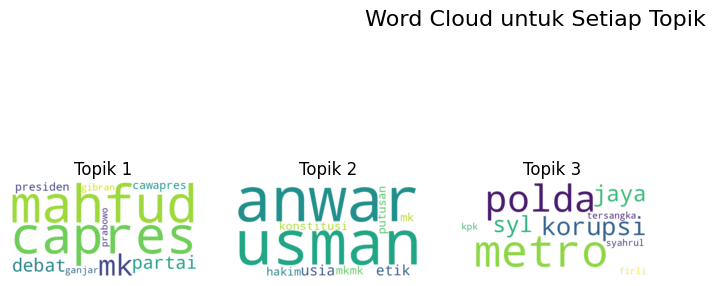

In [13]:
# Membuat model LSA dengan 10 topik
lsa_model = TruncatedSVD(n_components=3)
lsa_topic_matrix = lsa_model.fit_transform(X)

# Mendapatkan kata-kata teratas untuk setiap topik
terms = vectorizer.get_feature_names_out()
top_terms_per_topic = []
for topic in lsa_model.components_:
    top_terms = [terms[j] for j in topic.argsort()[-10:]]
    top_terms_per_topic.append(top_terms)

# Word Cloud
plt.figure(figsize=(14, 8))
for i in range(3):
    plt.subplot(2, 5, i+1)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(top_terms_per_topic[i]))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topik {i+1}')
    plt.axis('off')
plt.suptitle('Word Cloud untuk Setiap Topik', fontsize=16)
plt.show()

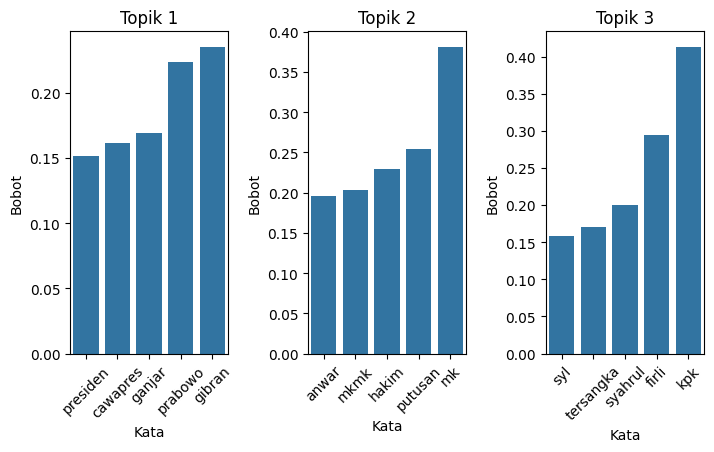

In [14]:
# Bar Plot Topik Kata untuk LSA
plt.figure(figsize=(12, 8))
for i in range(3):
    plt.subplot(2, 5, i+1)
    top_terms = [terms[j] for j in lsa_model.components_[i].argsort()[-5:]]
    top_weights = sorted(lsa_model.components_[i])[-5:]
    sns.barplot(x=top_terms, y=top_weights)
    plt.title(f'Topik {i+1}')
    plt.xlabel('Kata')
    plt.ylabel('Bobot')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
